In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir()

['.config',
 'Learner_1_model.pkl',
 'images_labels_names.xlsx',
 'drive',
 'sample_data']

In [ ]:
import keras
import os
import cv2
import numpy as np
import pandas as pd
import glob
import tensorflow as tf
from PIL import Image
import sys
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D , Dropout, Add, BatchNormalization
from keras.models import Model
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
from keras.layers import concatenate
Trainimages_path='/content/drive/MyDrive/images'
Trainod_path='/content/drive/MyDrive/labels'

In [ ]:
excel_file_path = "/content/images_labels_names.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
image_files_train = np.array(df['Images'][:90])
label_files_train = np.array(df['Labels'][:90])

In [ ]:
image_files_test = np.array(df['Images'][90:])
label_files_test = np.array(df['Labels'][90:])

In [ ]:
lsorted_images_train = image_files_train
def read_images_train(Trainimages_path) :
    # l = os.listdir(Trainimages_path)

    images = []
    mat_imgs = []
    grayim=[]
    for file in lsorted_images_train:
        img = cv2.imread(Trainimages_path+"/" + file)
        # print(Trainimages_path+file)
        images.append(img)
        #print(images)
        mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(file)
        mat_imgs.append(np.array(mat_im))
        grayi= cv2.cvtColor(mat_im,cv2.COLOR_RGB2GRAY)
        grayim.append(np.array(grayi))
    return images,mat_imgs,grayim

In [ ]:
imgs_train,mat_train,grayimage_train = read_images_train(Trainimages_path)

In [ ]:
lsorted_images_test = image_files_test
def read_images_test(Trainimages_path) :
    # l = os.listdir(Trainimages_path)

    images = []
    mat_imgs = []
    grayim=[]
    for file in lsorted_images_test:
        img = cv2.imread(Trainimages_path+"/" + file)
        # print(Trainimages_path+file)
        images.append(img)
        #print(images)
        mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(file)
        mat_imgs.append(np.array(mat_im))
        grayi= cv2.cvtColor(mat_im,cv2.COLOR_RGB2GRAY)
        grayim.append(np.array(grayi))
    return images,mat_imgs,grayim

In [ ]:
imgs_test,mat_test,grayimage_test = read_images_test(Trainimages_path)

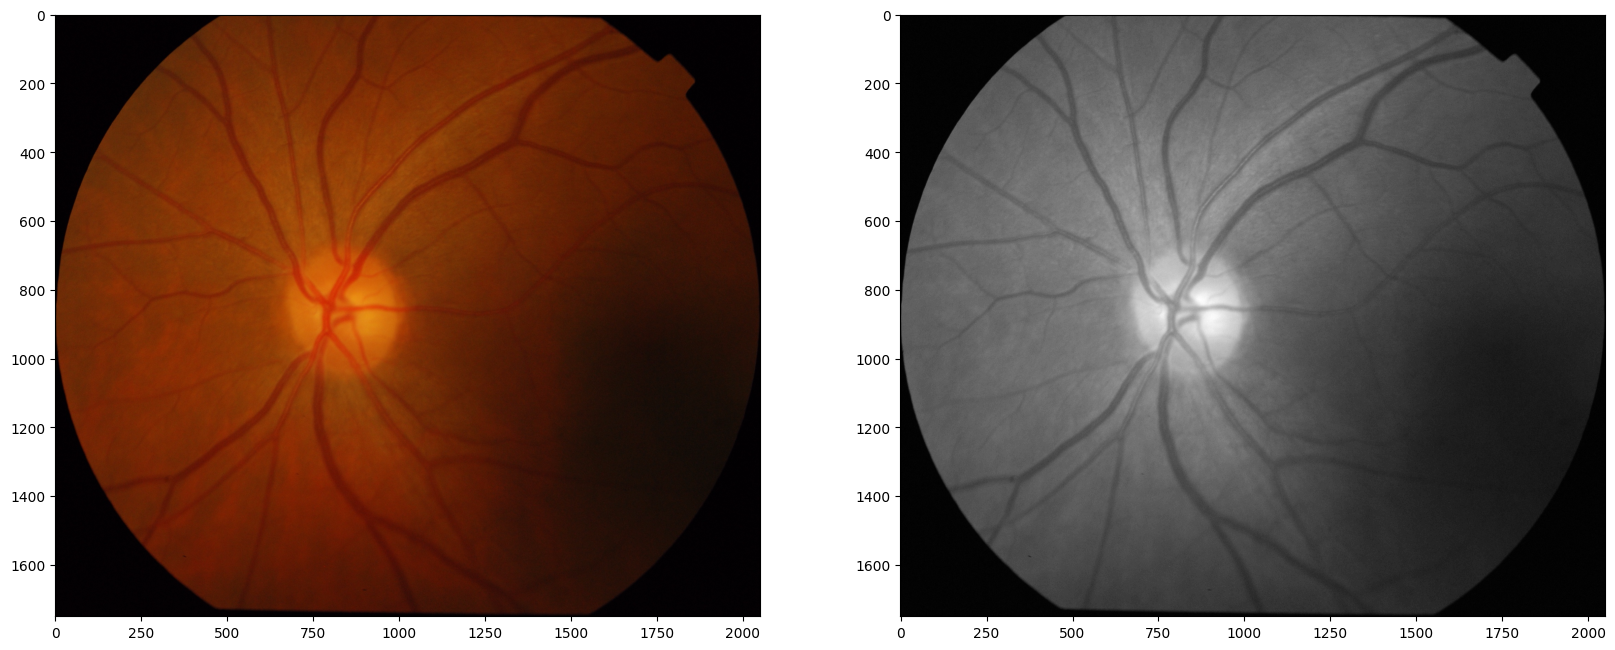

In [ ]:
i=16
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(mat_train[i])
ax[1].imshow(grayimage_train[i],cmap='gray')

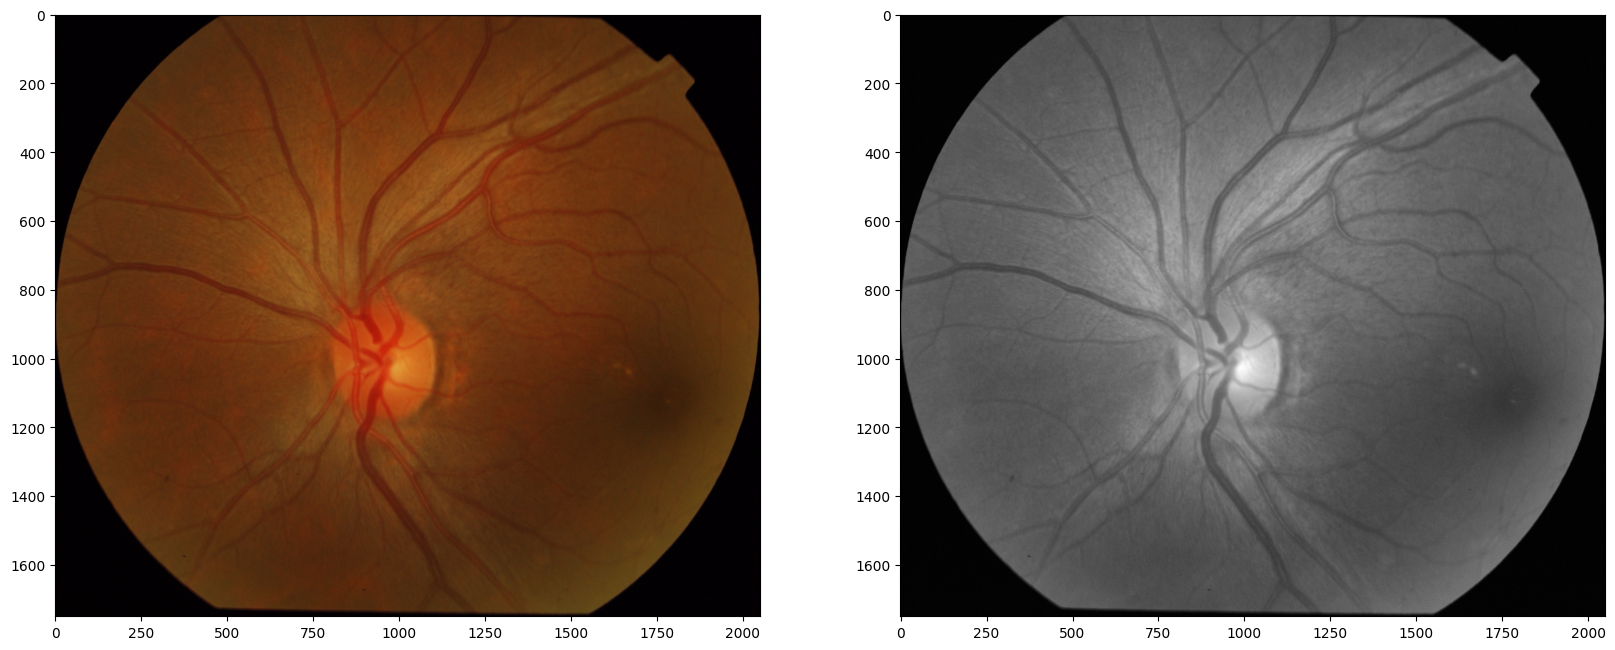

In [ ]:
i=3
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(mat_test[i])
ax[1].imshow(grayimage_test[i],cmap='gray')

In [ ]:
lsorted_train = label_files_train
def read_masks_train(Trainod_path):
    l = os.listdir(Trainod_path)
    #print(l)
    images_train = []
    for file in lsorted_train:
        img = cv2.imread(Trainod_path+"/" + file)
        #mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(Trainod_path + file)
        images_train.append(np.array(img))
        #mat_imgs.append(mat_im)
    return images_train

In [ ]:
masks_train = read_masks_train(Trainod_path)

In [ ]:
lsorted_test = label_files_test
def read_masks_test(Trainod_path):
    l = os.listdir(Trainod_path)
    #print(l)
    images_test = []
    for file in lsorted_test:
        img = cv2.imread(Trainod_path+"/" + file)
        #mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(Trainod_path + file)
        images_test.append(np.array(img))
        #mat_imgs.append(mat_im)
    return images_test

In [ ]:
masks_test = read_masks_test(Trainod_path)

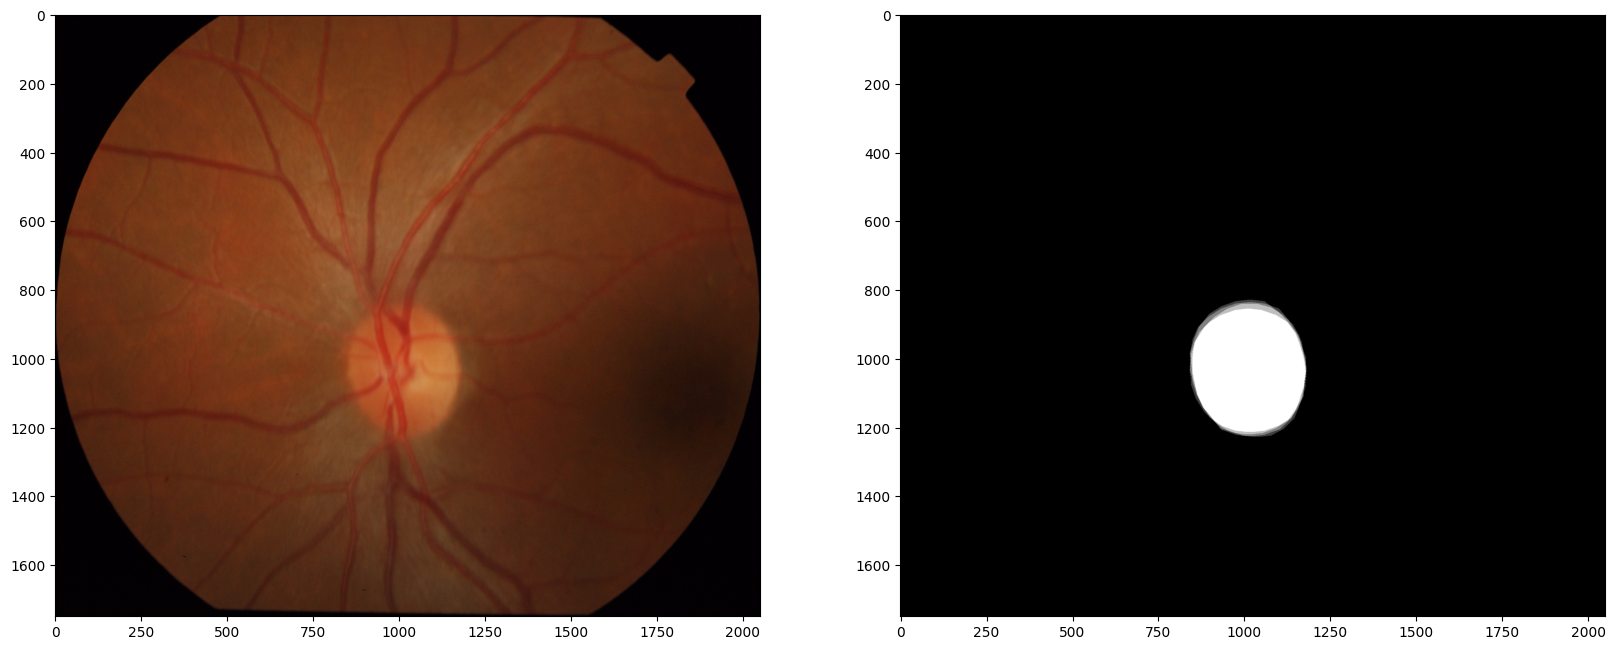

In [ ]:
i=88
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(mat_train[i])
ax[1].imshow(masks_train[i],cmap='gray')

In [ ]:
new_masks_train = []
for mask in masks_train:
  new_masks_train.append(cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY))

In [ ]:
new_masks_test = []
for mask in masks_test:
  new_masks_test.append(cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY))

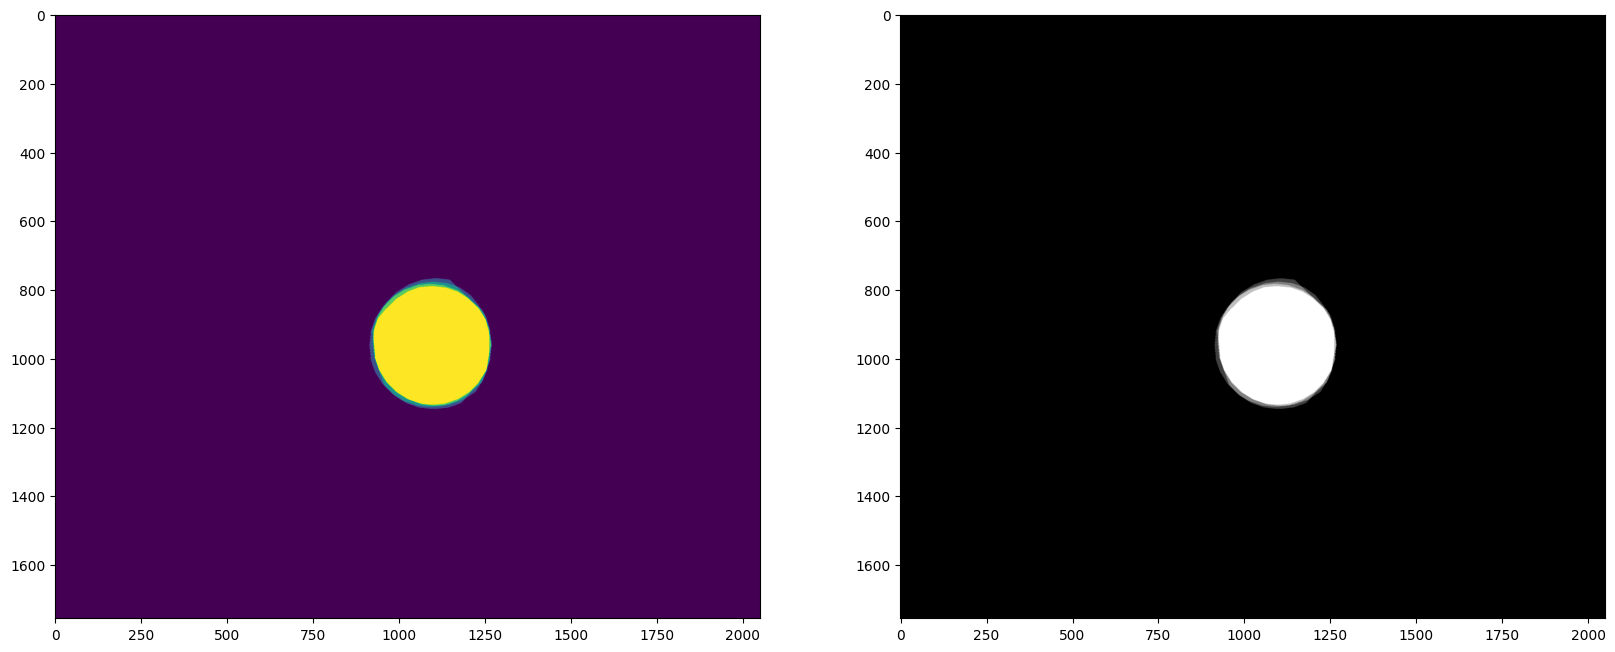

In [ ]:
i=7
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(new_masks_train[i])
ax[1].imshow(masks_train[i])


In [ ]:
imgs_train[0].shape

(1751, 2049, 3)

In [ ]:
masks_train[7].shape

(1755, 2049, 3)

In [ ]:
new_masks_train[7].shape

(1755, 2049)

In [ ]:
# Reshaping
images_train = []
labels_train = []
new_labels_train = []
for i in range(len(imgs_train)):
  # dimension are inverted
  # shapes need to be divisible by 256 as the network goes 8 layers deep(2^8)
  # resizing to the closest multiple of 256
  images_train.append(cv2.resize(imgs_train[i],(768,512), interpolation = cv2.INTER_AREA))    #576,384
  labels_train.append(cv2.resize(masks_train[i],(768,512), interpolation = cv2.INTER_AREA))   #512*704
  new_labels_train.append(cv2.resize(new_masks_train[i],(768,512), interpolation = cv2.INTER_AREA))

In [ ]:
# Reshaping
images_test = []
labels_test = []
new_labels_test = []
for i in range(len(imgs_test)):
  # dimension are inverted
  # shapes need to be divisible by 256 as the network goes 8 layers deep(2^8)
  # resizing to the closest multiple of 256
  images_test.append(cv2.resize(imgs_test[i],(768,512), interpolation = cv2.INTER_AREA))    #576,384
  labels_test.append(cv2.resize(masks_test[i],(768,512), interpolation = cv2.INTER_AREA))   #512*704
  new_labels_test.append(cv2.resize(new_masks_test[i],(768,512), interpolation = cv2.INTER_AREA))

In [ ]:
newimgs_train = []
for i in images_train:
  newimgs_train.append(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))

In [ ]:
newimgs_test = []
for i in images_test:
  newimgs_test.append(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))

In [ ]:
print(images_train[0].shape)
print(labels_train[0].shape)
print(new_labels_train[0].shape)
print(len(images_train))

(512, 768, 3)
(512, 768, 3)
(512, 768)
90


In [ ]:
print(images_test[0].shape)
print(labels_test[0].shape)
print(new_labels_test[0].shape)
print(len(images_test))

(512, 768, 3)
(512, 768, 3)
(512, 768)
11


In [ ]:
X_train = np.array(images_train)/255
X_test = np.array(images_test)/255
Y_train = np.array(new_labels_train)/255
Y_test = np.array(new_labels_test)/255

In [ ]:
test_images = lsorted_images_test
import pandas as pd
df = pd.DataFrame({"Test Image": test_images})
excel_file_name = "X_test.xlsx"
df.to_excel(excel_file_name, index=False)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(90, 512, 768, 3)
(90, 512, 768)
(11, 512, 768, 3)
(11, 512, 768)


In [ ]:
def encoder(X,output):
  x = Conv2D(output,(3,3),activation = 'relu', padding = 'same',dilation_rate=3)(X)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu', padding = 'same',dilation_rate=2)(x)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)

  temp = x
  x = MaxPooling2D((2,2))(x)
  return x, temp

In [ ]:
def decoder(X,output,feature):
  x = Conv2D(output, (3,3),activation = 'relu', padding = 'same')(X)
  x = BatchNormalization(axis = -1)(x)
  x = UpSampling2D((2,2))(x)
  x = Add()([feature,x])
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)
  return x

In [ ]:
def func_auto(intput_shape):

  X_input = Input(input_shape)

  #encoder
  x,temp1 = encoder(X_input,16)
  x,temp2 = encoder(x,16*2)
  x,temp3 = encoder(x,16*3)
  x,temp4 = encoder(x,16*4)
  x,temp5 = encoder(x,16*5)
  x,temp6 = encoder(x,16*6)
  x,temp7 = encoder(x,16*7)
  x,temp8 = encoder(x,16*8)

  #decoder
  x = decoder(x,16*8,temp8)
  x = decoder(x,16*7,temp7)
  x = decoder(x,16*6,temp6)
  x = decoder(x,16*5,temp5)
  x = decoder(x,16*4,temp4)
  x = decoder(x,16*3,temp3)
  x = decoder(x,16*2,temp2)
  x = decoder(x,16,temp1)

  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)


  model = Model(inputs = X_input, outputs = decoded, name = 'func_auto')
  return model

In [ ]:
input_shape = (512,768,3)
model = func_auto(input_shape)


In [ ]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [ ]:
import math
from math import log

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
def MixedLoss(y_true, y_pred):          # 80% Binary cross entropy   & 20% contrastive loss
    term1=(y_true * (0.8*K.log (y_pred+0.001))+(0.2*y_pred*y_pred))
    term2=((1-y_true) * (0.8*K.log (1-(y_pred+0.001))+0.2*(K.max((0.5-y_pred),0)**2)))
    z=term1+term2
    return -1*(K.sum(K.sum(z))/(512*768))

In [ ]:
def MixedLoss2(y_true, y_pred):          # 80% Binary cross entropy   & 20% contrastive loss
    term1=(y_true * (0.8*K.log (y_pred+0.001))+(0.2*y_pred*y_pred))
    term2=((1-y_true) * (0.7*K.log (1-(y_pred+0.001))+0.3*(K.max((0.1-y_pred),0)**2)))
    z=term1+term2
    return -1*(K.sum(K.sum(z))/(512*768))

In [ ]:
Y_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
model.compile(optimizer = 'Adam', loss = MixedLoss2)

In [ ]:
model.summary()

Model: "func_auto"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 768, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 768, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 768, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                         

In [ ]:
len(model.layers)

123

In [ ]:
model.fit(X_train, Y_train,
                epochs=200,
                batch_size=16,
                shuffle=True,
                use_multiprocessing=True,
                workers=4)

Epoch 1/200
6/6 [==============================] - 33s 3s/step - loss: 5.5971
Epoch 2/200
6/6 [==============================] - 7s 1s/step - loss: 4.8705
Epoch 3/200
6/6 [==============================] - 7s 1s/step - loss: 4.3658
Epoch 4/200
6/6 [==============================] - 7s 1s/step - loss: 3.9092
Epoch 5/200
6/6 [==============================] - 7s 1s/step - loss: 3.4931
Epoch 6/200
6/6 [==============================] - 7s 1s/step - loss: 3.1161
Epoch 7/200
6/6 [==============================] - 7s 1s/step - loss: 2.7821
Epoch 8/200
6/6 [==============================] - 7s 1s/step - loss: 2.4803
Epoch 9/200
6/6 [==============================] - 7s 1s/step - loss: 2.2171
Epoch 10/200
6/6 [==============================] - 7s 1s/step - loss: 1.9872
Epoch 11/200
6/6 [==============================] - 7s 1s/step - loss: 1.7896
Epoch 12/200
6/6 [==============================] - 7s 1s/step - loss: 1.6285
Epoch 13/200
6/6 [==============================] - 7s 1s/step - loss: 1

In [ ]:
import pickle

In [ ]:
file_name = 'Learner_1_model.pkl'

with open(file_name,'wb') as file:
  pickle.dump(model,file)

In [ ]:
with open('Learner_1_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 13s 13s/step


In [ ]:
output_folder = "/content/Learner_1"
os.makedirs(output_folder, exist_ok=True)

for i in range(len(lsorted_images_test)):
    prediction_image = predictions[i].reshape(Y_test[i].shape)
    filename = "Prediction_{}".format(lsorted_images_test[i])
    filepath = os.path.join(output_folder, filename)
    Image.fromarray((prediction_image * 255).astype(np.uint8)).save(filepath)

In [ ]:
predicted_images = [f for f in os.listdir('/content/Learner_1') if f.endswith(".png")]
predicted_images=sorted(predicted_images)

In [ ]:
test_images = lsorted_images_test
import pandas as pd
df = pd.DataFrame({"Test Image": test_images,"Prediction Images" : predicted_images})
excel_file_name = "Predictions_Learner1.xlsx"
df.to_excel(excel_file_name, index=False)

In [ ]:
newimgs_train[1].shape

(512, 768, 3)

In [ ]:
predictions[1].shape

(512, 768, 1)

In [ ]:
Y_test[1].shape

(512, 768)

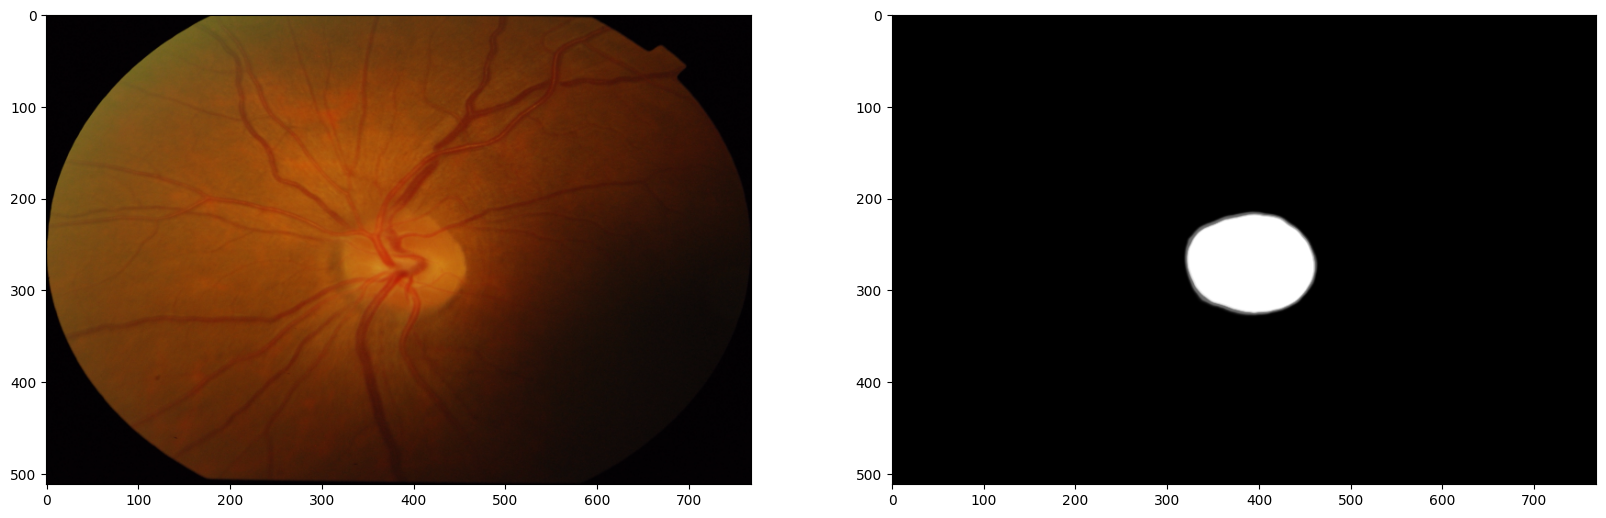

In [ ]:
i=2
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(newimgs_test[i],cmap='gray')
ax[1].imshow(predictions[i].reshape(Y_test[i].shape),cmap = 'gray')
#ax[2].imshow(Y_test[i]),cmap = 'gray')

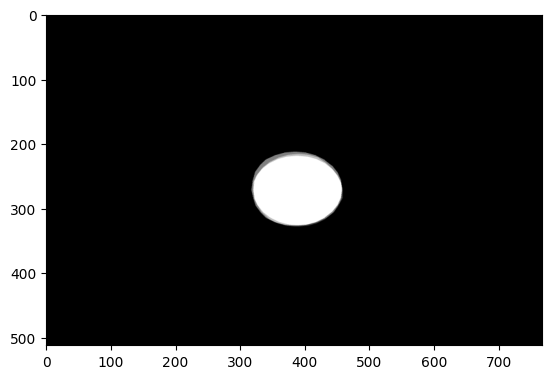

In [ ]:
plt.imshow(Y_test[i],cmap = 'gray')

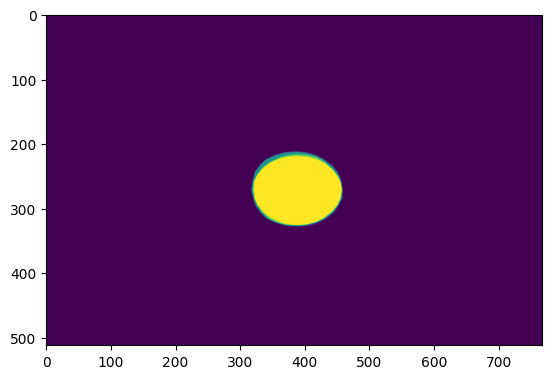

In [ ]:
plt.imshow(Y_test[i])

In [ ]:
total_samples = len(predictions)
threshold = 0.1
accuracies_data = []

for idx in range(total_samples):
    T = 0
    F = 0
    k = predictions[idx]
    for i in range(k.shape[0]):
        for j in range(k.shape[1]):
            if abs(k[i][j][0] - Y_test[idx][i][j]) < threshold:
                T += 1
            else:
                F += 1
    accuracy = T / (T + F)
    file_name = predicted_images[idx]
    accuracies_data.append((file_name, accuracy))
df = pd.DataFrame(accuracies_data, columns=['File Name', 'Accuracy in Learner CNN 1'])

In [ ]:
prediction = []
for image_filename in os.listdir('/content/drive/MyDrive/Learner_1/numpy_images'):
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Learner_1/numpy_images', image_filename))
    prediction.append(img)

In [ ]:
prediction_images = []
for img in prediction:
    resized_img = cv2.resize(img, (768, 512), interpolation=cv2.INTER_AREA)
    normalized_img = resized_img / 255.0
    prediction_images.append(normalized_img)

In [ ]:
T = 0
F = 0
threshold = 0.1
accuracies_data = []
a = []
for idx in range(len(prediction_images)):
    T = 0
    F = 0
    k = prediction_images[idx]

    for i in range(k.shape[0]):
        for j in range(k.shape[1]):
            if abs(k[i][j][0] - Y_test[idx][i][j]) < threshold:
                T += 1
            else:
                F += 1
    accuracy = T / (T + F)
    file_name = predicted_images[idx]
    accuracies_data.append(accuracy)
df['Accuracy or reviser CNN'] = accuracies_data

In [ ]:
df.describe()

,Accuracy in Learner CNN 1,Accuracy or reviser CNN
count,11.000000,11.000000
mean,0.992717,0.992723
std,0.003883,0.003887
min,0.984952,0.984950
25%,0.991150,0.991156
50%,0.994459,0.994453
75%,0.995024,0.995033
max,0.996770,0.996780


In [ ]:
df.to_excel('accuracies.xlsx', index=False)

In [ ]:
!zip -r /content/prediction_1.zip /content/Learner_1

  adding: content/Learner_1/ (stored 0%)
  adding: content/Learner_1/Prediction_drishtiGS_100.png (deflated 22%)
  adding: content/Learner_1/Prediction_drishtiGS_095.png (deflated 25%)
  adding: content/Learner_1/Prediction_drishtiGS_096.png (deflated 24%)
  adding: content/Learner_1/Prediction_drishtiGS_091.png (deflated 25%)
  adding: content/Learner_1/Prediction_drishtiGS_098.png (deflated 21%)
  adding: content/Learner_1/Prediction_drishtiGS_094.png (deflated 26%)
  adding: content/Learner_1/Prediction_drishtiGS_101.png (deflated 21%)
  adding: content/Learner_1/Prediction_drishtiGS_099.png (deflated 22%)
  adding: content/Learner_1/Prediction_drishtiGS_097.png (deflated 21%)
  adding: content/Learner_1/Prediction_drishtiGS_093.png (deflated 23%)
  adding: content/Learner_1/Prediction_drishtiGS_092.png (deflated 25%)
